# DATASET CREATION

In [77]:
import scipy
from scipy import stats

#librerías necesarias:

# Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualization
import seaborn as sns
#import plotly.express as px
import matplotlib as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib inline 

# sklearn
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

#pd.set_option("max_rows", None)


## Data

In [78]:
import glob

path = r'C:\Users\valen\Google Drive\Machine Learning\ML - GitHub\APP TNA Prov\Dataset\Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, decimal=',')
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

C:\Users\valen\anaconda3\envs\valentin\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Deal with 2018 dataset

In [79]:
data_18 = pd.read_csv('data\credito-historico-mensual-2018.csv', decimal='.', delimiter=',')

### 2020 file

In [80]:
data_20 = pd.read_csv('https://www.presupuestoabierto.gob.ar/datasets/2020/credito-mensual-2020.zip', decimal=',')

### Concatenate all Datasets

In [81]:
data_vf = pd.concat([data, data_18, data_20], axis=0, ignore_index=True)

In [82]:
data_vf.shape

(6878023, 53)

### Filter Columns and rows

In [83]:
data_1 = pd.DataFrame(data_vf, columns=['impacto_presupuestario_anio', 'impacto_presupuestario_mes','inciso_id','inciso_desc', 'principal_id', 'principal_desc', 'parcial_id', 'parcial_desc', 'finalidad_id', 'finalidad_desc', 'funcion_id', 'funcion_desc', 'ubicacion_geografica_id', 'ubicacion_geografica_desc', 'credito_devengado'])

In [84]:
data_2 = data_1[data_1['inciso_desc'] == 'Transferencias']

In [85]:
list = ['Transf. a Inst. Prov. y Mun. para Fin. Gastos Corrientes', 
        'Transf. a Inst. Prov. y Mun. para Financ. Gastos de Capital']

In [86]:
f_data = data_2[data_2['principal_desc'].isin(list)]
f_data.shape

(202657, 15)

In [87]:
f_data.columns

Index(['impacto_presupuestario_anio', 'impacto_presupuestario_mes',
       'inciso_id', 'inciso_desc', 'principal_id', 'principal_desc',
       'parcial_id', 'parcial_desc', 'finalidad_id', 'finalidad_desc',
       'funcion_id', 'funcion_desc', 'ubicacion_geografica_id',
       'ubicacion_geografica_desc', 'credito_devengado'],
      dtype='object')

### Parse Date

In [88]:
f_data['Fecha'] = f_data['impacto_presupuestario_anio'].map(str) + '/' + f_data['impacto_presupuestario_mes'].map(str)

C:\Users\valen\anaconda3\envs\valentin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
f_data['Fecha'] = pd.to_datetime(f_data['Fecha'])

C:\Users\valen\anaconda3\envs\valentin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
f_data.dtypes

impacto_presupuestario_anio             int64
impacto_presupuestario_mes              int64
inciso_id                               int64
inciso_desc                            object
principal_id                            int64
principal_desc                         object
parcial_id                              int64
parcial_desc                           object
finalidad_id                            int64
finalidad_desc                         object
funcion_id                              int64
funcion_desc                           object
ubicacion_geografica_id                 int64
ubicacion_geografica_desc              object
credito_devengado                      object
Fecha                          datetime64[ns]
dtype: object

### Parse Numbers

In [91]:
f_data['credito_devengado'] = pd.to_numeric(f_data['credito_devengado']) 

C:\Users\valen\anaconda3\envs\valentin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
f_data[:5]

,impacto_presupuestario_anio,impacto_presupuestario_mes,inciso_id,inciso_desc,principal_id,principal_desc,parcial_id,parcial_desc,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ubicacion_geografica_id,ubicacion_geografica_desc,credito_devengado,Fecha
3246,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,1,ADMINISTRACION GUBERNAMENTAL,3,Dirección Superior Ejecutiva,2,Capital Federal - Ciudad de Buenos Aires,0.0,2010-01-01
3315,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,2010-01-01
3316,2010,1,5,Transferencias,8,Transf. a Inst. Prov. y Mun. para Financ. Gast...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,2010-01-01
3482,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,2010-01-01
3483,2010,1,5,Transferencias,8,Transf. a Inst. Prov. y Mun. para Financ. Gast...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,2010-01-01


In [93]:
f_data.dtypes

impacto_presupuestario_anio             int64
impacto_presupuestario_mes              int64
inciso_id                               int64
inciso_desc                            object
principal_id                            int64
principal_desc                         object
parcial_id                              int64
parcial_desc                           object
finalidad_id                            int64
finalidad_desc                         object
funcion_id                              int64
funcion_desc                           object
ubicacion_geografica_id                 int64
ubicacion_geografica_desc              object
credito_devengado                     float64
Fecha                          datetime64[ns]
dtype: object

In [94]:
f_data.shape

(202657, 16)

In [95]:
group = pd.DataFrame(f_data, columns=['Fecha', 'credito_devengado'])

In [96]:
group.groupby('Fecha').sum()

,credito_devengado
Fecha,
2010-01-01,376.873410
2010-02-01,1628.853295
2010-03-01,2703.248390
2010-04-01,1252.331100
2010-05-01,2237.126748
...,...
2020-08-01,17937.298227
2020-09-01,44685.542717
2020-10-01,29031.700160


### Add IPC - base 12/2016=100

In [97]:
ipc = pd.read_excel('Datos Accesorios\IPC Nacional.xlsx', date_parser='Fecha')
ipc.tail()

,Fecha,IPC (base dic-16 = 100)
127,2020-08-01,331.695700
128,2020-09-01,340.902000
129,2020-10-01,353.044400
130,2020-11-01,363.538100
131,2020-12-01,378.079624


#### Joint

In [98]:
tna = f_data.set_index('Fecha').join(ipc.set_index('Fecha')).reset_index()

tna[:5]

,Fecha,impacto_presupuestario_anio,impacto_presupuestario_mes,inciso_id,inciso_desc,principal_id,principal_desc,parcial_id,parcial_desc,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ubicacion_geografica_id,ubicacion_geografica_desc,credito_devengado,IPC (base dic-16 = 100)
0,2010-01-01,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,1,ADMINISTRACION GUBERNAMENTAL,3,Dirección Superior Ejecutiva,2,Capital Federal - Ciudad de Buenos Aires,0.0,16.731829
1,2010-01-01,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,16.731829
2,2010-01-01,2010,1,5,Transferencias,8,Transf. a Inst. Prov. y Mun. para Financ. Gast...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,16.731829
3,2010-01-01,2010,1,5,Transferencias,7,Transf. a Inst. Prov. y Mun. para Fin. Gastos ...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,16.731829
4,2010-01-01,2010,1,5,Transferencias,8,Transf. a Inst. Prov. y Mun. para Financ. Gast...,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,Capital Federal - Ciudad de Buenos Aires,0.0,16.731829


In [99]:
tna['credito_real'] = tna['credito_devengado']/tna['IPC (base dic-16 = 100)']

In [100]:
tna = tna.drop(['impacto_presupuestario_anio', 'impacto_presupuestario_mes', 'IPC (base dic-16 = 100)'], axis=1)

In [101]:
tna.dtypes

Fecha                        datetime64[ns]
inciso_id                             int64
inciso_desc                          object
principal_id                          int64
principal_desc                       object
parcial_id                            int64
parcial_desc                         object
finalidad_id                          int64
finalidad_desc                       object
funcion_id                            int64
funcion_desc                         object
ubicacion_geografica_id               int64
ubicacion_geografica_desc            object
credito_devengado                   float64
credito_real                        float64
dtype: object

In [102]:
tna['principal_desc'] = tna['principal_desc'].replace(['Transf. a Inst. Prov. y Mun. para Fin. Gastos Corrientes','Transf. a Inst. Prov. y Mun. para Financ. Gastos de Capital'], ['TNA Corrientes','TNA de Capital'])

### Drop Rows and replace names

In [103]:
tna.shape

(202657, 15)

In [104]:
tna_prov = pd.DataFrame(tna, columns=['ubicacion_geografica_id', 'ubicacion_geografica_desc']).reset_index()
prov = pd.DataFrame(tna_prov['ubicacion_geografica_desc'].unique(), columns=['ubicacion_geografica_desc']).set_index('ubicacion_geografica_desc')

In [105]:
prov

""
ubicacion_geografica_desc
Capital Federal - Ciudad de Buenos Aires
Nacional
No Clasificado
Provincia de Buenos Aires
Provincia de Entre Ríos
Provincia de La Rioja
Provincia de Mendoza
Provincia de Misiones
Provincia del Neuquén


#### Drop irrelevant locations

We are going to drop this locations: 'Nacional' , 'No Clasificado', 'Binacional', 'Interprovincial'

In [106]:
drop_list = ['Nacional' , 'No Clasificado', 'Binacional', 'Interprovincial']

In [107]:
tna_1 = tna[tna['ubicacion_geografica_desc'].isin(drop_list) == False]
tna_1.shape

(199942, 15)

#### Replace 

In [108]:
tna_2 = tna_1.replace(['Prov. de Tierra del Fuego, Antártida e Islas del Atlántico S', 'Provincia de Tierra del Fuego, Antártida e Islas del Atlánti', 'Provincia de Tierra del Fuego, Antártida e Islas del Atlántico Sur'], ['Tierra del Fuego', 'Tierra del Fuego', 'Tierra del Fuego'])

In [109]:
tna_3 = tna_2.replace(['Capital Federal - Ciudad de Buenos Aires', 'Ciudad Autónoma de Buenos Aires'], ['C.A.B.A.', 'C.A.B.A.'])

In [110]:
tna_4 = tna_3.replace('Provincia de ', '', regex=True)
tna_4[:5]

,Fecha,inciso_id,inciso_desc,principal_id,principal_desc,parcial_id,parcial_desc,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ubicacion_geografica_id,ubicacion_geografica_desc,credito_devengado,credito_real
0,2010-01-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,1,ADMINISTRACION GUBERNAMENTAL,3,Dirección Superior Ejecutiva,2,C.A.B.A.,0.0,0.0
1,2010-01-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,C.A.B.A.,0.0,0.0
2,2010-01-01,5,Transferencias,8,TNA de Capital,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,C.A.B.A.,0.0,0.0
3,2010-01-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,C.A.B.A.,0.0,0.0
4,2010-01-01,5,Transferencias,8,TNA de Capital,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,2,C.A.B.A.,0.0,0.0


In [111]:
tna_vf = tna_4.replace('Provincia del ', '',  regex=True)

In [112]:
pd.DataFrame(tna_vf['ubicacion_geografica_desc'].unique(), columns=['ubicacion_geografica_desc'])

,ubicacion_geografica_desc
0,C.A.B.A.
1,Buenos Aires
2,Entre Ríos
3,La Rioja
4,Mendoza
5,Misiones
6,Neuquén
7,Río Negro
8,Santa Cruz
9,Santiago del Estero


In [113]:
tna_vf.reset_index(drop=True, inplace=True)

In [114]:
tna_vf.shape

(199942, 15)

### Population

We are going to consider the population per province per million hab.

In [115]:
tna_vf['Anio'] = pd.PeriodIndex(tna_vf['Fecha'], freq='A')

In [116]:
population = pd.read_excel('Datos Accesorios\Población Provincias.xlsx', sheet_name='Hoja3', date_parser='fecha').drop('Anio', axis=1)

In [117]:
population['Anio'] = pd.PeriodIndex(population['fecha'], freq='A')

In [118]:
population.dtypes

Provincia            object
poblacion           float64
fecha        datetime64[ns]
Anio          period[A-DEC]
dtype: object

In [119]:
population.tail()

,Provincia,poblacion,fecha,Anio
259,Santa Cruz,0.365698,2020-01-01,2020
260,Santa Fe,3.536418,2020-01-01,2020
261,Santiago del Estero,0.978313,2020-01-01,2020
262,Tucumán,1.694656,2020-01-01,2020
263,Tierra del Fuego,0.173432,2020-01-01,2020


#### Joint

In [120]:
final = tna_vf.merge(population, how='left', left_on=['ubicacion_geografica_desc', 'Anio'], right_on=['Provincia', 'Anio'])

In [121]:
final.tail()

,Fecha,inciso_id,inciso_desc,principal_id,principal_desc,parcial_id,parcial_desc,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ubicacion_geografica_id,ubicacion_geografica_desc,credito_devengado,credito_real,Anio,Provincia,poblacion,fecha
199937,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,54,Misiones,326.591746,0.863817,2020,Misiones,1.261294,2020-01-01
199938,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,82,Santa Fe,1153.308407,3.050438,2020,Santa Fe,3.536418,2020-01-01
199939,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,22,Chaco,700.000000,1.851462,2020,Chaco,1.204541,2020-01-01
199940,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,34,Formosa,70.000000,0.185146,2020,Formosa,0.605193,2020-01-01
199941,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,54,Misiones,120.000000,0.317393,2020,Misiones,1.261294,2020-01-01


#### Transf per-capita

In [122]:
final['tna(nominal)_pc'] = final['credito_devengado']/final['poblacion']

In [123]:
final = final.drop(['ubicacion_geografica_desc', 'ubicacion_geografica_id', 'fecha'], axis=1)

In [124]:
final.tail()

,Fecha,inciso_id,inciso_desc,principal_id,principal_desc,parcial_id,parcial_desc,finalidad_id,finalidad_desc,funcion_id,funcion_desc,credito_devengado,credito_real,Anio,Provincia,poblacion,tna(nominal)_pc
199937,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,326.591746,0.863817,2020,Misiones,1.261294,258.933877
199938,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,1153.308407,3.050438,2020,Santa Fe,3.536418,326.123328
199939,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,700.000000,1.851462,2020,Chaco,1.204541,581.134225
199940,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,70.000000,0.185146,2020,Formosa,0.605193,115.665581
199941,2020-12-01,5,Transferencias,7,TNA Corrientes,1,Transferencias a Gobiernos Provinciales,3,SERVICIOS SOCIALES,3,Seguridad Social,120.000000,0.317393,2020,Misiones,1.261294,95.140388


In [125]:
final.shape

(199942, 17)

## Write CSV

In [126]:
final.to_csv('final_vf.csv')

## Data Exploration

### Nominal terms

In [127]:
tna_nominal = pd.DataFrame(final, columns=['credito_devengado', 'principal_desc', 'Fecha', 'Provincia'])

In [128]:
tna_nominal.set_index('Fecha', inplace=True)

In [129]:
tna_nominal.index

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=199942, freq=None)

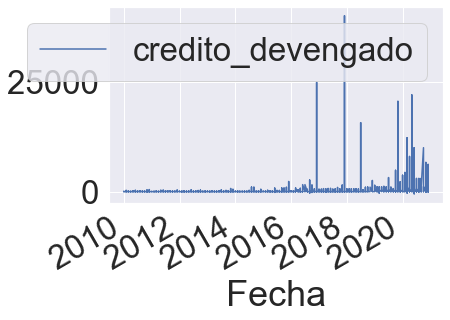

In [130]:
figsize=(9,6)

tna_nominal.plot()
plt.pyplot.show()

### Outliers Detection

We want to detect if the Data presents any outlier.

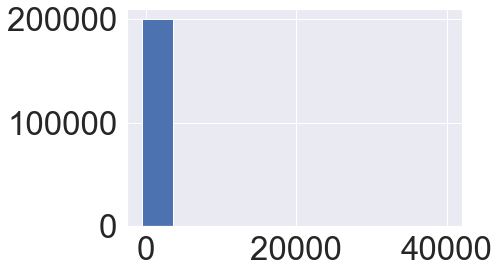

In [131]:
tna_nominal.credito_devengado.hist();

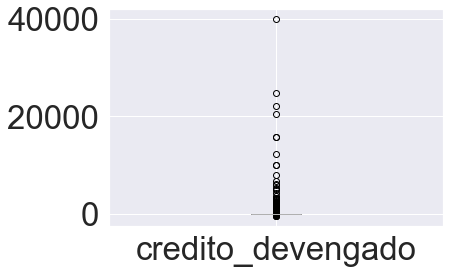

In [132]:
tna_nominal.boxplot(column='credito_devengado');

In [133]:
outliers = tna_nominal[tna_nominal.credito_devengado > (tna_nominal.credito_devengado.mean() + 
                                                            3 * tna_nominal.credito_devengado.std())]
outliers.sort_values(by='credito_devengado', ascending=False)[['credito_devengado', 'Provincia']]

,credito_devengado,Provincia
Fecha,,
2017-12-01,40000.000000,Buenos Aires
2016-12-01,24846.000000,Buenos Aires
2020-05-01,22000.000000,Buenos Aires
2019-11-01,20536.495202,Buenos Aires
2018-07-01,15686.185335,Buenos Aires
...,...,...
2017-04-01,473.287375,San Juan
2010-12-01,471.500000,Santa Cruz
2020-12-01,471.420349,Buenos Aires


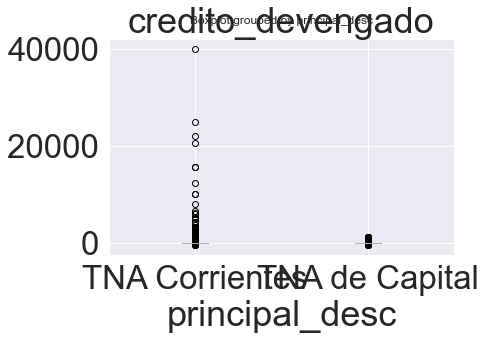

In [134]:
figsize=(25,20)

tna_nominal.boxplot(column='credito_devengado', by='principal_desc');

We didnt detect any outliers, those 'big' numbers are related to real expenditures.

### Graphs

#### Real terms vs. population growth

In [135]:
real = pd.DataFrame(final, columns=['Fecha', 'Provincia', 'credito_real'])

In [136]:
pop = pd.DataFrame(final, columns=['Fecha', 'Provincia', 'poblacion'])

Set period index per year

In [137]:
real['Fecha'] = pd.PeriodIndex(real['Fecha'], freq='A')

In [138]:
pop['Fecha'] = pd.PeriodIndex(pop['Fecha'], freq='A')

Create a new dataframe grouping and adding up real expenditures

In [139]:
real_1 = real.groupby(['Fecha', 'Provincia']).sum()
real_1.shape

(264, 1)

Create a new dataframe considering only one sample of population

In [140]:
pop_1 = pop.groupby(['Fecha', 'Provincia']).mean()
pop_1.shape

(264, 1)

Merge both dataset - groupby with real expenditure and population. We do this step to avoid a summ in population

In [141]:
real_pop = real_1.merge(pop_1, how='left', left_on=['Provincia', 'Fecha'], right_on=['Provincia', 'Fecha'])

In [142]:
real_pop

,,credito_real,poblacion
Provincia,Fecha,,
Buenos Aires,2010,440.531410,15.716942
C.A.B.A.,2010,45.364161,3.028481
Catamarca,2010,20.879952,0.377676
Chaco,2010,92.797834,1.080017
Chubut,2010,19.093624,0.513433
...,...,...,...
Santa Cruz,2020,19.612758,0.365698
Santa Fe,2020,66.537567,3.536418
Santiago del Estero,2020,26.037251,0.978313


In [143]:
x = real_pop.xs('Buenos Aires').pct_change()

In [144]:

credito = pd.DataFrame(columns=['Provincias','credito_real'])
pob = pd.DataFrame(columns=['Provincias', 'poblacion'])


provincias = ['Buenos Aires', 'C.A.B.A.', 'Catamarca', 'Chaco', 'Chubut',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tierra del Fuego', 'Tucumán']

# anio = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for prov in real_pop.index.get_level_values('Provincia').unique():

    var = real_pop.loc[prov]
    
    credito = credito.append({'Provincias':prov,     
                         'credito_real': var['credito_real'].pct_change()}, ignore_index=True)
    pob = pob.append({'Provincias': prov,
                      'poblacion': var['poblacion'].pct_change()}, ignore_index=True)
    
    
    credito.explode('credito_real')
    pob.explode('poblacion')
    
    
    
    cre = credito.explode('credito_real')
    po = pob.explode('poblacion')
    
    cre['indice'] = range(len(cre))
    po['indice'] = range(len(po))
    
final_real_pop = cre.merge(po, how='left', left_on=['Provincias', 'indice'], right_on=['Provincias', 'indice'])

In [145]:
final_real_pop

,Provincias,credito_real,indice,poblacion
0,Buenos Aires,NaN,0,NaN
1,Buenos Aires,-0.194142,1,0.0122584
2,Buenos Aires,-0.175014,2,0.012006
3,Buenos Aires,0.0596849,3,0.0117375
4,Buenos Aires,-0.028732,4,0.0114521
...,...,...,...,...
259,Tucumán,-0.292046,259,0.0129313
260,Tucumán,-0.0469645,260,0.0127154
261,Tucumán,0.124889,261,0.0124823
262,Tucumán,-0.593291,262,0.0122305


#### Add years Columns

In [146]:
year = pd.DataFrame({'anio': [('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020')]})

In [147]:
year_1 = year.loc[year.index.repeat(24)]
year_2 = year_1.explode('anio')

In [148]:
year_2['indice'] = range(len(year_2))

##### joint with initial dataframe

In [149]:
real_pop_vf = final_real_pop.merge(year_2, how='left', left_on=['indice'], right_on=['indice'])

In [150]:
real_pop_vf = real_pop_vf.dropna()
real_pop_vf = real_pop_vf.drop(['indice'], axis=1)

In [151]:
real_pop_vf = real_pop_vf.sort_values(by='anio')
real_pop_vf['anio'] = real_pop_vf['anio'].astype(int)
real_pop_vf

,Provincias,credito_real,poblacion,anio
1,Buenos Aires,-0.194142,0.0122584,2011
67,Córdoba,-0.482127,0.0114876,2011
221,Santa Fe,-0.109434,0.00844131,2011
78,Entre Ríos,-0.0265515,0.0104892,2011
34,Chaco,-0.00478971,0.0116739,2011
...,...,...,...,...
186,Salta,0.13806,0.012664,2020
197,San Juan,0.376617,0.0107922,2020
208,San Luis,0.993299,0.0126056,2020
109,Jujuy,0.310707,0.011071,2020


##### Graph

Variación interanual TNA en términos reales y crecimiento interanual poblacional 
 Por provincia y por anio
Variación 2010 vs. 2011


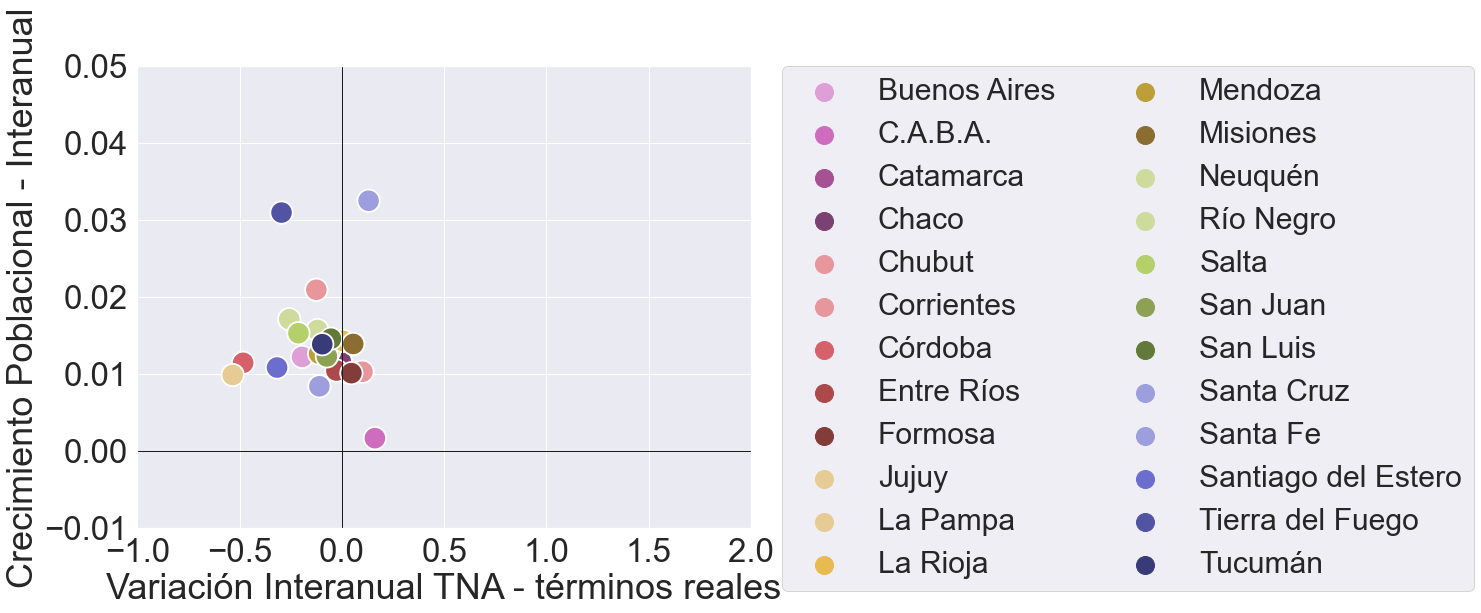

Variación 2011 vs. 2012


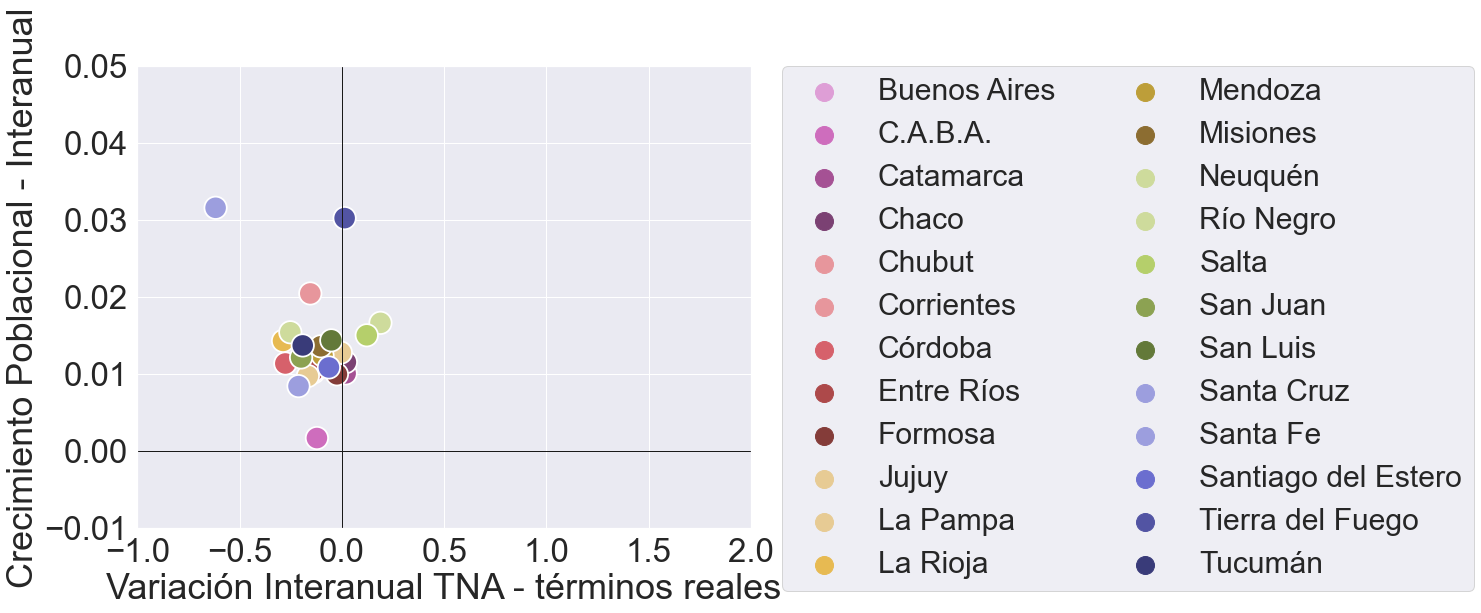

Variación 2012 vs. 2013


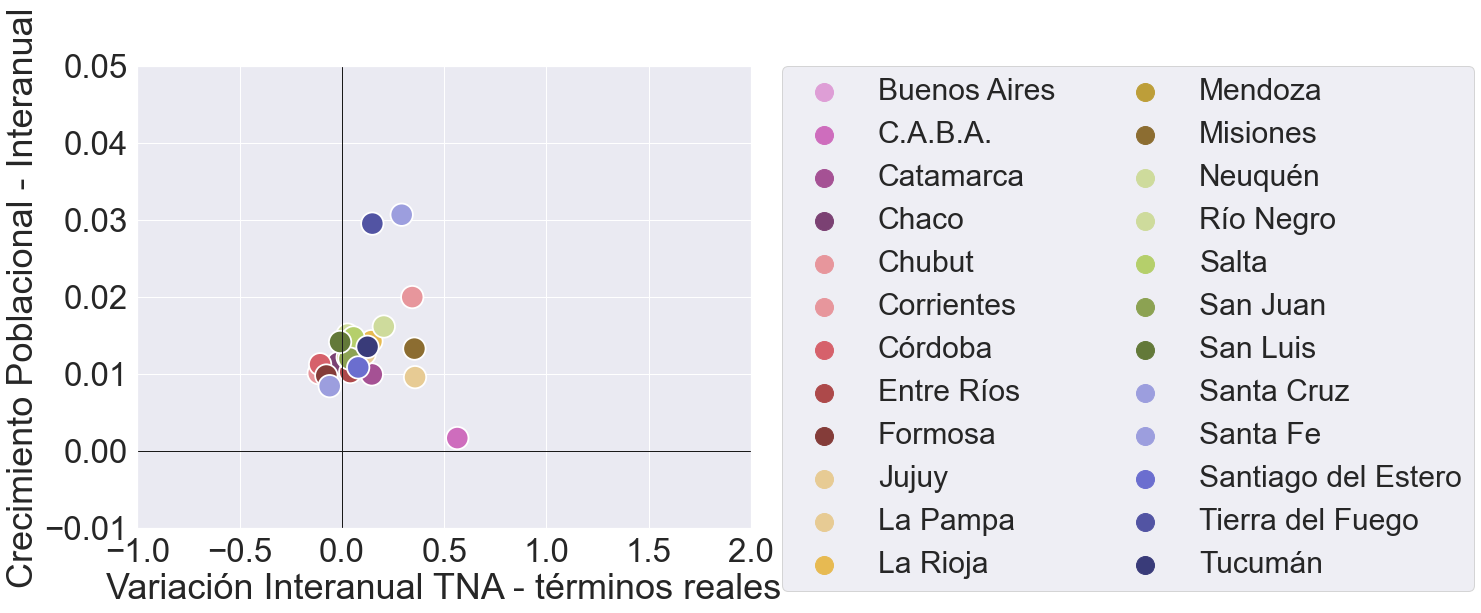

Variación 2013 vs. 2014


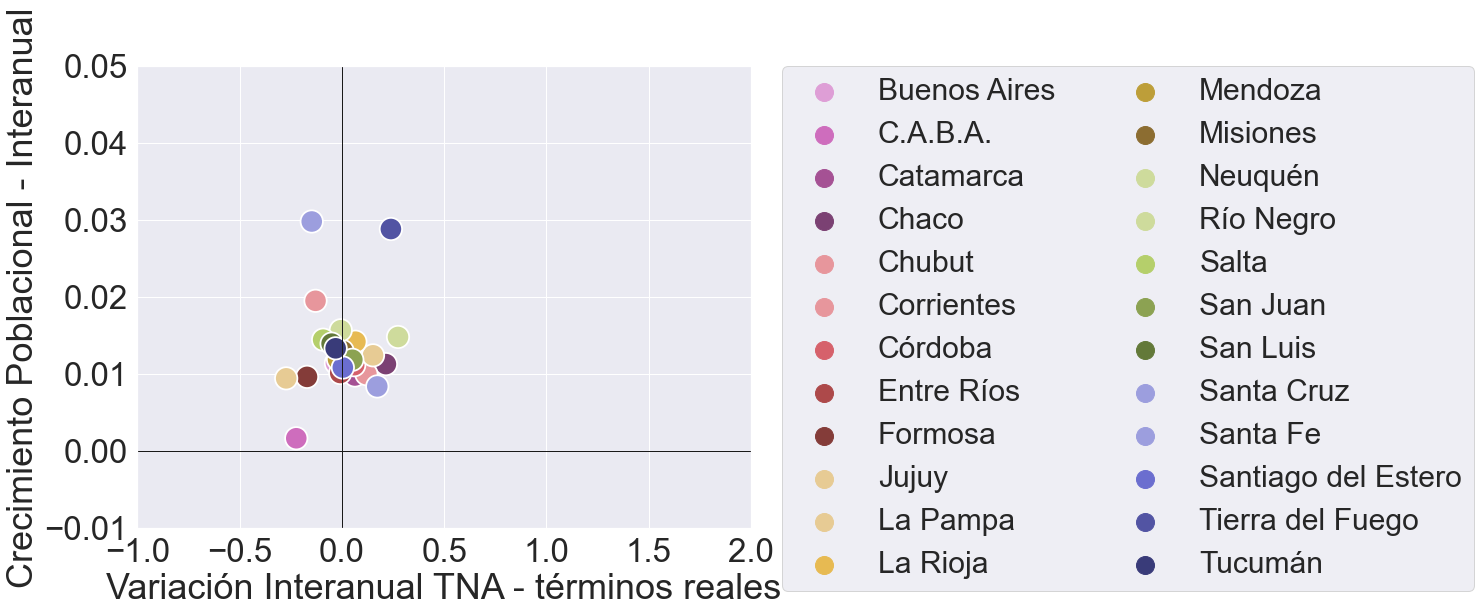

Variación 2014 vs. 2015


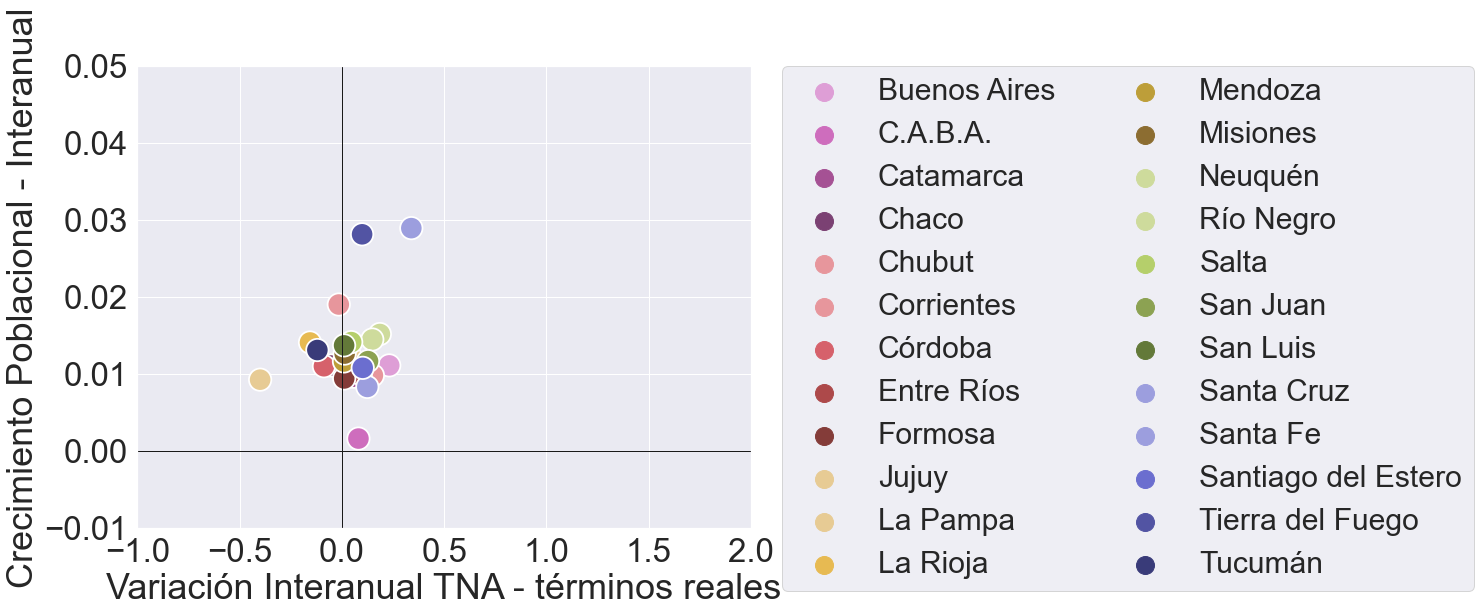

Variación 2015 vs. 2016


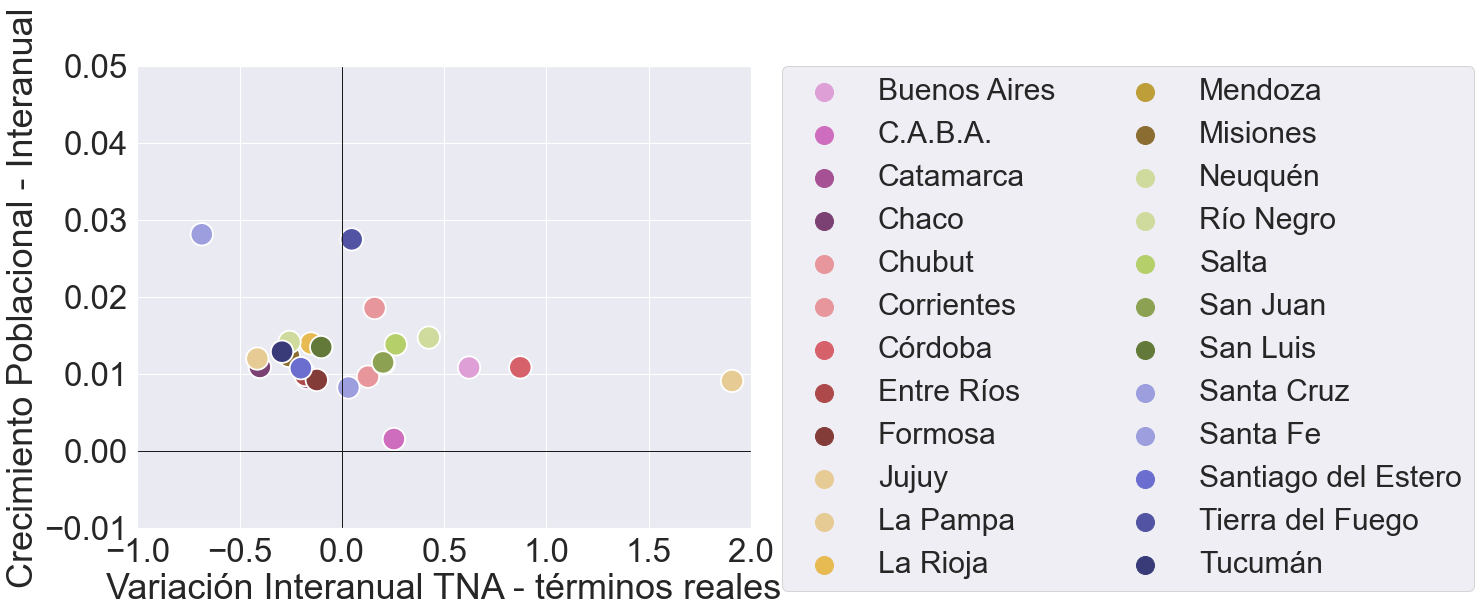

Variación 2016 vs. 2017


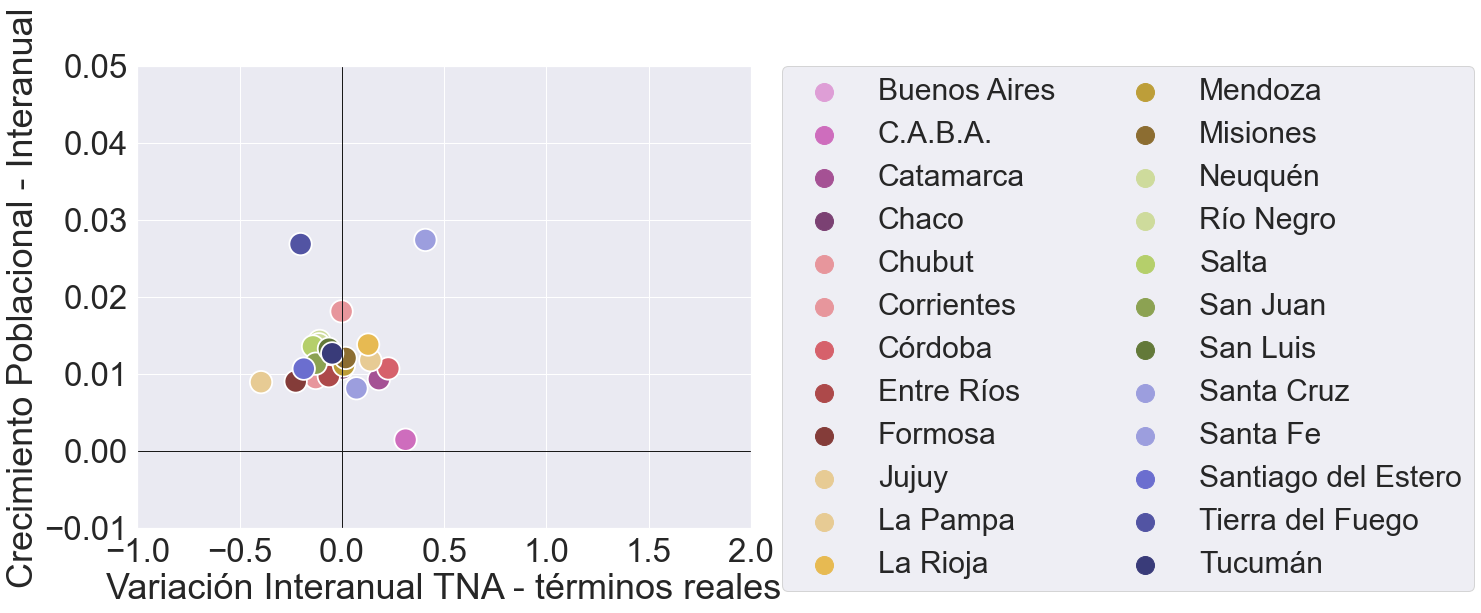

Variación 2017 vs. 2018


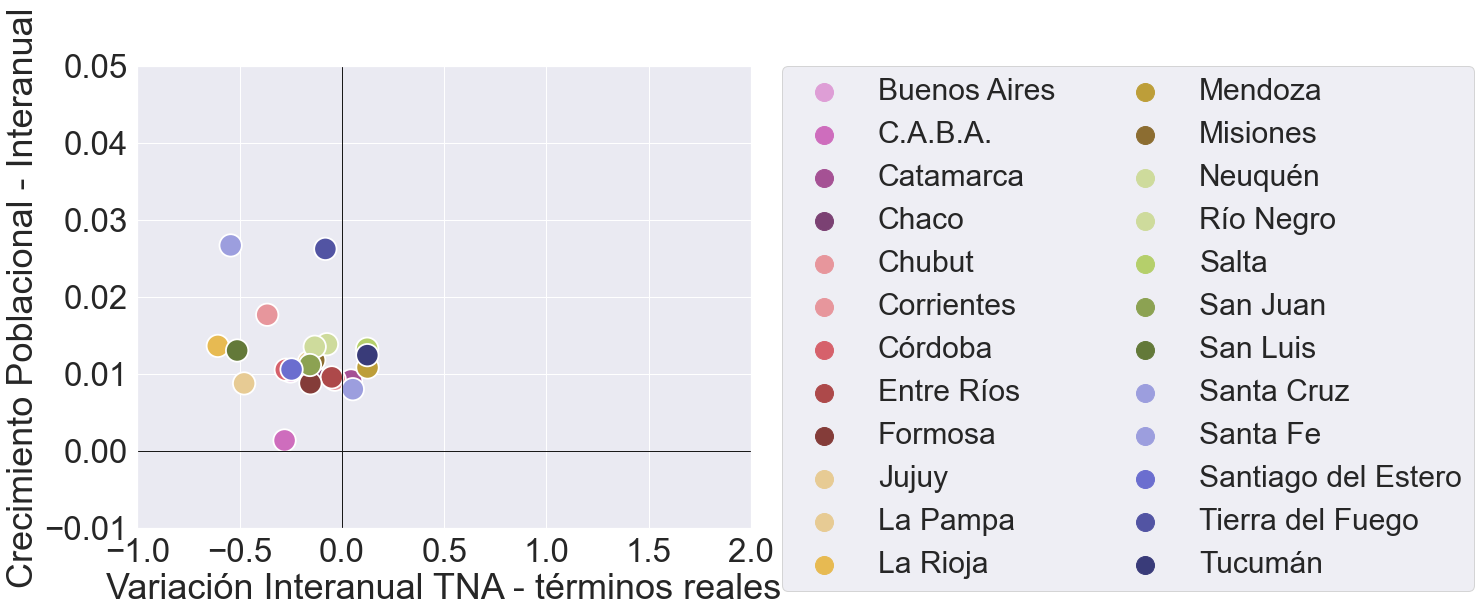

Variación 2018 vs. 2019


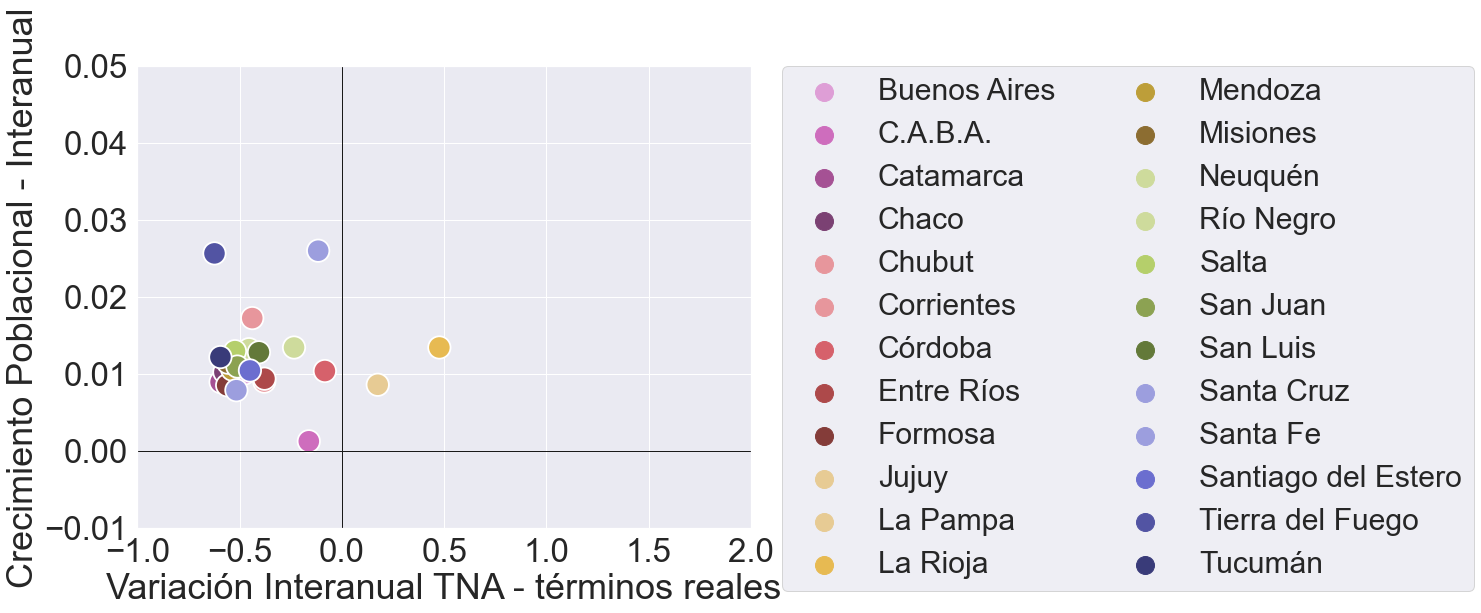

Variación 2019 vs. 2020


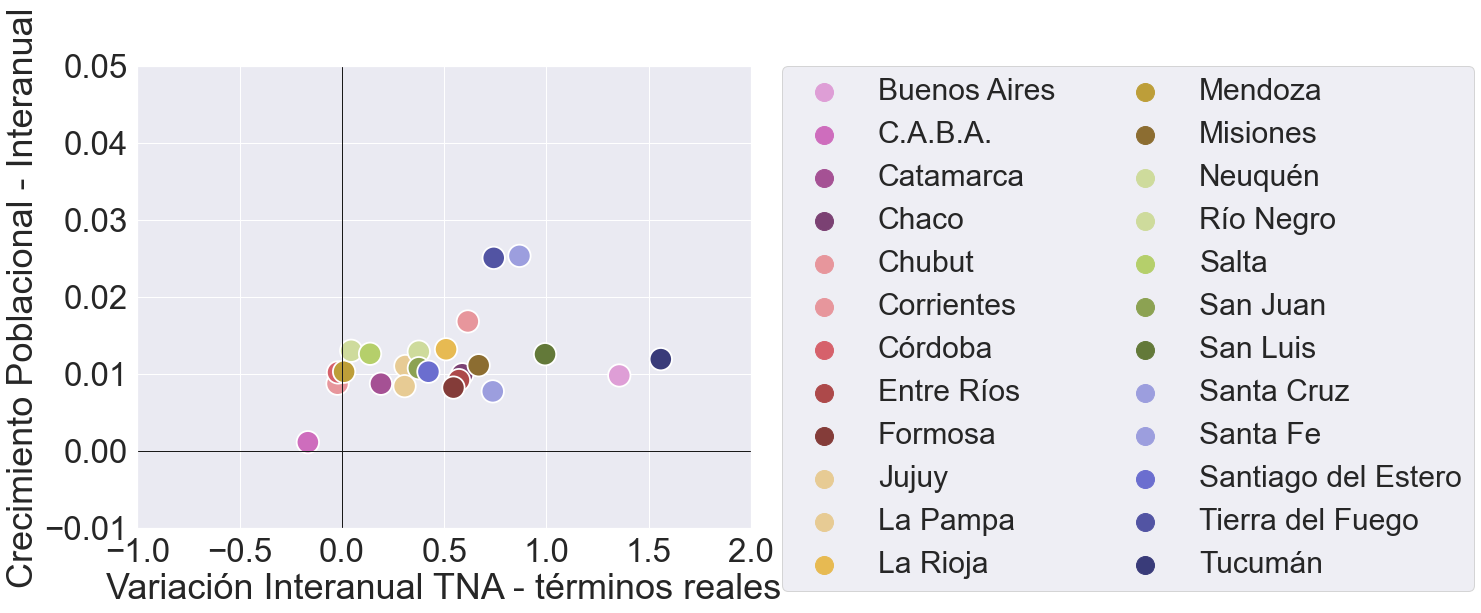

In [152]:
print('Variación interanual TNA en términos reales y crecimiento interanual poblacional', '\n', 'Por provincia y por anio') 

anios = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for z in range(2011, 2021):
   

     x_1 = real_pop_vf[real_pop_vf['anio'] == z].drop(['anio'], axis=1).sort_values(by='Provincias')
     
     
     
     print('Variación', z-1, 'vs.', z)
     sns.set(font_scale=3)
     fig, ax = plt.pyplot.subplots(figsize=(11, 8.5))
     sns.scatterplot(data=x_1, x='credito_real',y='poblacion', hue='Provincias', palette="tab20b_r", s=500, ax=ax)
     ax.axhline(y=0, color='k', linewidth=1)  # added because i want the origin
     ax.axvline(x=0, color='k', linewidth=1)
     plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, fontsize=30, markerscale=3)
     plt.pyplot.ylabel('Crecimiento Poblacional - Interanual')
     plt.pyplot.xlabel('Variación Interanual TNA - términos reales')
     plt.pyplot.ylim(-0.01, 0.05)
     plt.pyplot.xlim(-1, 2)
     plt.pyplot.show()
     
 # Anios impares
    # plt.subplot(1, 2, 1)
    
    
    

 # Anios pares
    # plt.subplot(1, 2, 2)
    # plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    # plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    # plt.ylim(y_range_start, y_range_stop)
    # plt.title("Conjunto de Validación")

    

#### Calculando con las tasas promedios por anio

In [153]:
final_real_pop['credito_real'] = final_real_pop['credito_real'].astype(float)

In [154]:
final_real_pop['poblacion'] = final_real_pop['poblacion'].astype(float)

In [155]:
tasas = final_real_pop.groupby('Provincias').mean().reset_index()

In [156]:
tasas['credito_real'] = tasas['credito_real'].astype(float).map(lambda n: '{:.2%}'.format(n))

In [157]:
tasas['poblacion'] = tasas['poblacion'].astype(float).map(lambda n: '{:.2%}'.format(n))

In [158]:
tasas

,Provincias,credito_real,indice,poblacion
0,Buenos Aires,11.15%,5,1.10%
1,C.A.B.A.,4.23%,16,0.15%
2,Catamarca,-0.30%,27,0.96%
3,Chaco,-3.71%,38,1.10%
4,Chubut,-1.04%,49,1.89%
5,Corrientes,-3.12%,60,0.97%
6,Córdoba,-1.66%,71,1.09%
7,Entre Ríos,-1.38%,82,0.99%
8,Formosa,-7.27%,93,0.93%
9,Jujuy,-4.05%,104,1.21%


In [83]:
# '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'

### Create dataframe with the anual rate of real expenditures and 

aca deberia hacer una guia exploratoria basica, por provincia y por clasificaciones mas desagrupadas del gasto. previamente deberia incluir la poblacion por provincias.

podria hacer un grafico que contraste el crecimiento del gasto en terminos reales y el crecimiento de la poblacion. un grafico de dispersion.